### Convolutional NN for the Fashion-MNIST dataset

* Methodology adapted from fastai developed by Jeremy Howard
* Trained on GPU machine
* dataset has fashion images for 10 different product categories, 60K training images and 10K validation images
* we leverage a pretrained **RESNEXT 50** for our convolutional layers
* achieves > 90% accuracy without significant customization of model

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
# set path and size of image to 224
PATH='data/'
sz=299

In [5]:
arch=resnext50
data=ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch,sz))
learn=ConvLearner.pretrained(arch,data,precompute=True)
learn.lr_find()

100%|██████████| 157/157 [01:28<00:00,  1.77it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 82%|████████▏ | 768/938 [00:11<00:02, 66.68it/s, loss=1.88] 

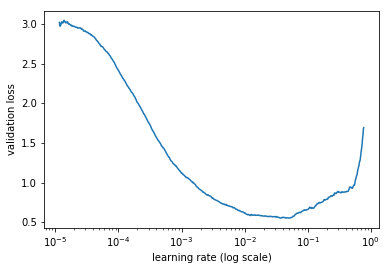

In [6]:
learn.sched.plot()

In [7]:
learn.fit(.0055,5,cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

 64%|██████▍   | 603/938 [00:09<00:05, 62.13it/s, loss=0.458]

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                    
    0      0.410604   0.359057   0.8732    
    1      0.383912   0.318634   0.8852                      
    2      0.348275   0.301388   0.8918                      
    3      0.329543   0.294306   0.8966                      
    4      0.326762   0.282199   0.8991                      



[array([ 0.2822]), 0.89910000000000001]

In [8]:
learn.fit(.0055,5,cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.32291    0.278915   0.9009    
    1      0.28993    0.276271   0.9033                      
    2      0.293241   0.272378   0.9043                      
    3      0.273797   0.261959   0.9069                      
    4      0.276262   0.260343   0.9074                      



[array([ 0.26034]), 0.90739999999999998]

### Data Augmentations 

* we can improve accuracy by adding more data sometimes

#### However new labeled data is hard to get

* Hence we can resort to image augmentations e.g. randomly changing images without impacting interpretation e.g. flipping, zooming, rotating
* of course the type of augmentation that won't change interpretation is dependent on the images and the problem you are solving

In [9]:
tfms=tfms_from_model(resnext50, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [22]:
data=ImageClassifierData.from_paths(PATH, tfms=tfms)
learn=ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 157/157 [01:29<00:00,  1.76it/s]


In [11]:
learn.precompute=False

In [12]:
learn.fit(.0055,5, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.502331   0.425296   0.8489    
    1      0.440793   0.385564   0.8624                      
    2      0.443921   0.359632   0.8716                      
    3      0.397276   0.352244   0.873                       
    4      0.3817     0.343733   0.8746                      



[array([ 0.34373]), 0.87460000000000004]

In [15]:
# remove tmp instead of setting precompute to False

In [23]:
learn.fit(.0055,5, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.425694   0.357999   0.8742    
    1      0.384874   0.320781   0.8866                      
    2      0.3457     0.302394   0.8934                      
    3      0.32812    0.291105   0.8967                      
    4      0.325691   0.281528   0.8988                      



[array([ 0.28153]), 0.89880000000000004]

In [24]:
learn.unfreeze()

In [25]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████  | 760/938 [07:18<01:42,  1.73it/s, loss=1.88] 

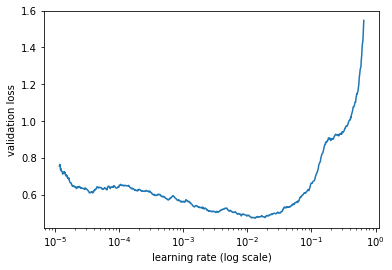

In [26]:
learn.sched.plot()

In [27]:
lr=np.array([1e-5, 1e-4, .0055])

In [28]:
learn.fit(lr, 5, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

  0%|          | 4/938 [00:03<12:12,  1.28it/s, loss=0.751]

Exception in thread Thread-32:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                    
    0      0.403258   0.307291   0.8896    
    1      0.403863   0.304884   0.8903                      
    2      0.401246   0.301592   0.8916                      
    3      0.372643   0.297299   0.8937                      
    4      0.386606   0.293763   0.8939                      



[array([ 0.29376]), 0.89390000000000003]

In [29]:
log_preds, y=learn.TTA()
probs=np.mean(np.exp(log_preds),0)

In [30]:
accuracy_np(probs,y)

0.90010000000000001

In [31]:
preds=np.argmax(probs, axis=1)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,preds)

## Confusion matrix for all 10 categories--visual representation

[[953   0   0   0   0   8   0  39   0   0]
 [  1 987   3   5   1   2   0   1   0   0]
 [  0   2 874  36  33   0  53   0   1   1]
 [  1   2  21 918  10   0  28   0   2  18]
 [  0   2  58  13 868   0  45   0   0  14]
 [  7   0   0   0   0 957   0  36   0   0]
 [  0  11 114  47  54   0 638   0   1 135]
 [ 19   1   0   0   0  17   0 963   0   0]
 [  1   2   1  19   1   0   3   0 973   0]
 [  1   8   5  44  14   2  56   0   0 870]]


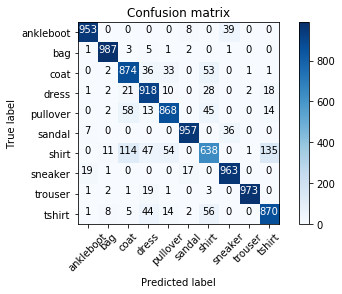

In [32]:
plot_confusion_matrix(cm, data.classes)